##### 【 ML - 생선 분류 모델 만들기 1 】

- 주__제 : 2개 종류 생선 분류 모델 만들기
- 데이터 : ../Data/fish.csv
- 피쳐들 : 길이와 무게. 실수형
- 타__겟 : 생선종류
- 학습종류: 지도학습 -> 분류
- 학습방법: 다양한 분류 알고리즘들 => KNN 최근접이웃알고리즘

[1] 데이터 확인 : 피쳐와 타겟 <hr>

In [1]:
## [1-1] 모듈 로딩 및 데이터 준비
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
pd.get_option('copy_on_write')

False

In [17]:
## [1-2] 데이터 로딩
DATA_FILE='../Data/fish.csv'

## 품종, 무게, 길이 컬럼만 추출
allDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
display(allDF.head(3))

## bream 도미, smelt 빙어 행만 추출
fishDF = allDF[(allDF.Species == 'Bream') | (allDF.Species == 'Smelt')]

## 행인덱스 초기화
fishDF.reset_index(drop=True, inplace=True)
display(fishDF.head(3), fishDF.tail(3))
fishDF.info()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


,Species,Weight,Length
46,Smelt,12.2,13.0
47,Smelt,19.7,14.3
48,Smelt,19.9,15.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


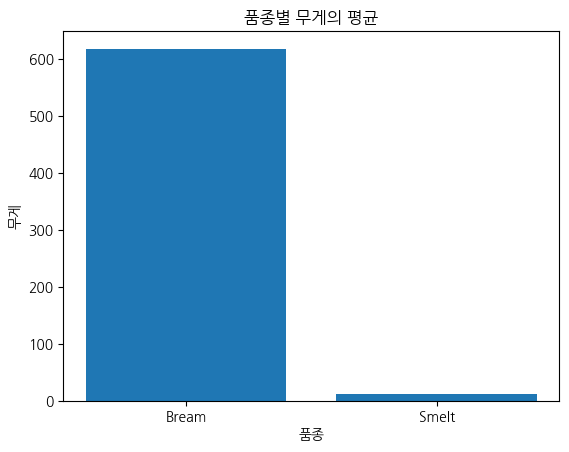

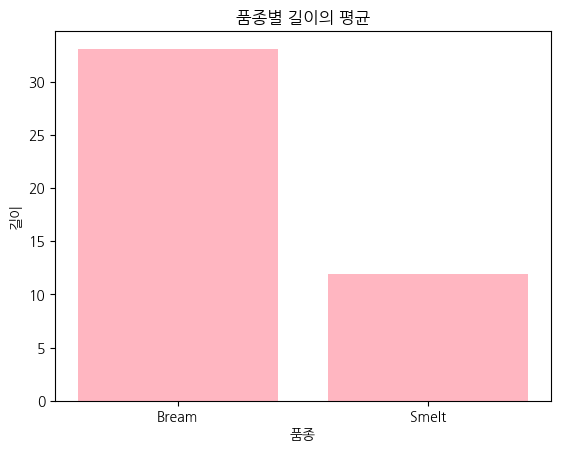

In [40]:
## [1-3] 무게와 길이 피쳐와 품종 분류 가능 여부
## - 시각화
df = fishDF.groupby('Species')['Weight'].mean()
plt.bar(df.index, df.values)
plt.title('품종별 무게의 평균')
plt.xlabel('품종')
plt.ylabel('무게')
plt.show()

df = fishDF.groupby('Species')['Length'].mean()
plt.bar(df.index, df.values, color='lightpink')
plt.title('품종별 길이의 평균')
plt.xlabel('품종')
plt.ylabel('길이')
plt.show()

## - 상관계수


In [ ]:
## [1-3] 무게와 같이 피쳐와 품종 분류 가능 여부

#fishDF["Species"] = fishDF["Species"].map({"Bream": 0, "Smelt": 1})  # 그냥 이렇게 뽑으면 series로 뽑혀서 replace를 사용못함.
pd.set_option('future.no_silent_downcasting', True)
fishDF.loc[:, 'Species'] = fishDF.loc[:, 'Species'].replace({'Bream':0, 'Smelt':1})
fishDF.Species = fishDF.Species.astype('category')
fishDF.Species
## 즉, series일때는 map 함수, df일때는 replace 사용

# fishDF['Species].astype('category').cat.codes ## 이렇게 하면 replace, map 할 필요없음! 0,1로 알아서 매핑해주는게 cat.codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Species  49 non-null     category
 1   Weight   49 non-null     float64 
 2   Length   49 non-null     float64 
dtypes: category(1), float64(2)
memory usage: 1.1 KB


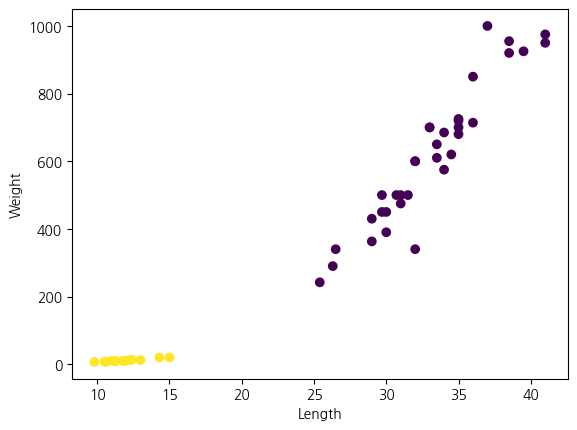

,Weight,Length
Weight,1.000000,0.960347
Length,0.960347,1.000000


In [47]:
## - 시각화 : 산점도 => 색상을 품종에따라 다르게 설정 c 매개변수
plt.scatter(fishDF.Length, fishDF.Weight, c=fishDF.Species)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

## - 상관계수
fishDF.corr(numeric_only=True)